In [9]:
import pandas as pd
import ujson
import json
import constants
import pickle as pckl
json_surah_words = '../output-data/json-surah-words/'

In [79]:
# surah_df = pd.read_json(json_surah_words + '1.json')
# for i in range(2, 115):
#     cur_df = pd.read_json(json_surah_words + str(i) + '.json')
#     surah_df = pd.concat([surah_df, cur_df], ignore_index=True)
#     #print(len(surah_df))

# fh = open("surah_df.pckl","wb")
# pckl.dump(surah_df, fh)
# fh.close()

In [82]:
fh = open("surah_df.pckl","rb")
surah_df = pckl.load(fh)
fh.close()
surah_df.head(5)

,answer,arabicAyah,ayahnum,frequency,pcklId,question,rootWord,rootWordId,rootWordType,surahnum,tlit,wazn,waznEnglish,waznTlit,waznType,wordnum,surahayahnum
0,(of) those,صِرَاطَ الَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْر...,7,1464,0,الَّذِينَ,ٱلَّذِى,59,nominal,1,alladhīna,ٱلَّذِى,"who, which, that",alladhī,Nominal (Relative pronoun),2,1/7
1,(of) Allah,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ,1,2851,147,اللَّهِ,أ ل ه,61,triliteral root,1,l-lahi,ٱللَّه,Allah,allah,Proper noun,2,1/1
2,(be) to Allah,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,2851,148,لِلَّهِ,أ ل ه,61,triliteral root,1,lillahi,ٱللَّه,Allah,allah,Proper noun,2,1/2
3,All praises and thanks,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,63,1,الْحَمْدُ,ح م د,352,triliteral root,1,al-ḥamdu,حَمْد,they be praised,ḥamd,Noun,1,1/2
4,(of the) Judgment,مَالِكِ يَوْمِ الدِّينِ,4,101,2,الدِّينِ,د ي ن,498,triliteral root,1,l-dīni,دِين,they acknowledge,dīn,Noun,3,1/4


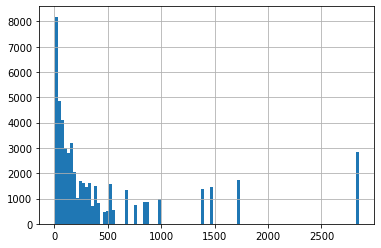

In [83]:
# surah_df[['ayahnum', 'frequency', 'rootWordId', 'tlit', 'waznType']]
df = surah_df[['surahayahnum', 'frequency', 'rootWordId']].copy(deep=True)

df['frequency'].hist(bins=100)

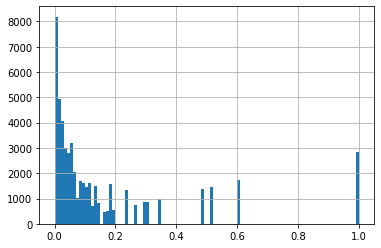

In [84]:
# la la la
# standarize frequency
moct = df['frequency'].describe()

std_multiplier_constant = 10
df['freq_stdized'] = (df['frequency'] - moct['mean']) / moct['std']
df['freq_stdized'] = df['freq_stdized'] + abs(min(df['freq_stdized']))
df['freq_stdized'] = df['freq_stdized'] / max(df['freq_stdized'])
df['freq_stdized'].hist(bins=100)

In [85]:
df.head()

,surahayahnum,frequency,rootWordId,freq_stdized
0,1/7,1464,59,0.513333
1,1/1,2851,61,1.000000
2,1/2,2851,61,1.000000
3,1/2,63,352,0.021754
4,1/4,101,498,0.035088


In [86]:
# build freq_stdized list
df2 = df.groupby('surahayahnum').frequency.apply(lambda x: ','.join(map(str, x))).reset_index()
df2.loc[:,'frequency'] = df2.loc[:, 'frequency'].apply(lambda x: [float(y) for y in x.split(",")])
df2.head()

,surahayahnum,frequency
0,1/1,"[2851.0, 339.0, 339.0, 381.0]"
1,1/2,"[2851.0, 63.0, 980.0, 854.0]"
2,1/3,"[339.0, 339.0]"
3,1/4,"[101.0, 206.0, 405.0]"
4,1/5,"[275.0, 11.0]"


In [87]:
# la la la
import numpy as np
df2['freq_score'] = df2.loc[:, 'frequency'].apply(lambda x: [i**1.1 for i in x])
df2.head()

,surahayahnum,frequency,freq_score
0,1/1,"[2851.0, 339.0, 339.0, 381.0]","[6316.797271173513, 607.0432970689194, 607.043..."
1,1/2,"[2851.0, 63.0, 980.0, 854.0]","[6316.797271173513, 95.33988075395158, 1951.41..."
2,1/3,"[339.0, 339.0]","[607.0432970689194, 607.0432970689194]"
3,1/4,"[101.0, 206.0, 405.0]","[160.23357084635074, 350.95702696395415, 738.2..."
4,1/5,"[275.0, 11.0]","[482.243034261262, 13.98079776731155]"


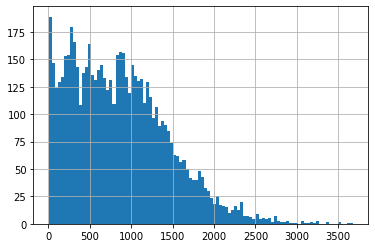

In [88]:
# different freq_score calculations
df3 = df2.copy(deep=True)
# df3['freq_score'] = df3.loc[:, 'freq_score'].apply(lambda x: np.mean(x))
df3['mean_freq_score'] = df3.loc[:, 'freq_score'].apply(lambda x: np.mean(x))
df3['min_freq_score'] = df3.loc[:, 'freq_score'].apply(lambda x: np.min(x))
# df3['freq_score'] = df3['mean_freq_score']
# df3['freq_score'] = df3.loc[:, 'freq_score'].apply(lambda x: np.mean(x) + np.min(x) ** 1.5)
# df3['freq_score'] = df3.loc[:, 'freq_score'].apply(lambda x: np.mean(x) * np.min(x) ** 1.5 * (1 / len(x))
# df3.head(10)
df3['mean_freq_score'].hist(bins=100)

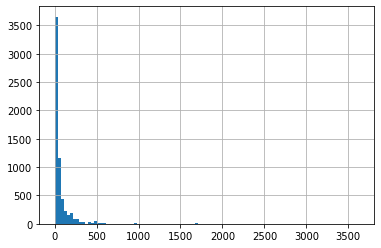

In [89]:
df3['min_freq_score'].hist(bins=100)

In [90]:
# normalize between 0-1000
def make_level(df, name_of_col):
    a, b = 0, 1000
    x, y = df[name_of_col].min(), df[name_of_col].max()
    df['level'] = b - (df[name_of_col] - x) / (y - x) * (b - a) + a
    df.level = df.level.round()
    df = df.sort_values(by=name_of_col, ascending=False)
    return df
df3 = make_level(df3, 'mean_freq_score')
df3.head(10)

,surahayahnum,frequency,freq_score,mean_freq_score,min_freq_score,level
4864,64/13,"[663.0, 2851.0, 2851.0, 2851.0, 879.0, 70.0]","[1269.5940582760643, 6316.797271173513, 6316.7...",3676.400436,107.055219,0.0
3819,44/34,[1722.0],[3627.7425744214192],3627.742574,3627.742574,13.0
1791,23/85,"[2851.0, 292.0, 1722.0, 1722.0]","[6316.797271173513, 515.1350928585845, 3627.74...",3521.854378,515.135093,42.0
1793,23/87,"[2851.0, 1722.0, 1722.0, 258.0]","[6316.797271173513, 3627.7425744214192, 3627.7...",3505.459056,449.553804,47.0
325,114/3,"[2851.0, 241.0]","[6316.797271173513, 417.07940646151883]",3366.938339,417.079406,84.0
314,112/1,"[85.0, 2851.0, 1722.0]","[132.54422749424077, 6316.797271173513, 3627.7...",3359.028024,132.544227,86.0
2877,35/17,"[2851.0, 119.0]","[6316.797271173513, 191.91179058479216]",3254.354531,191.911791,115.0
495,14/20,"[2851.0, 119.0]","[6316.797271173513, 191.91179058479216]",3254.354531,191.911791,115.0
3071,37/167,"[1722.0, 1390.0]","[3627.7425744214192, 2866.2646023344073]",3247.003588,2866.264602,117.0
3112,37/4,"[2851.0, 68.0]","[6316.797271173513, 103.69547467826129]",3210.246373,103.695475,127.0


In [91]:
df3['num_words_in_ayah'] = df3.loc[:, 'frequency'].apply(lambda x: len(x))
df3['85th_perc'] = df3.loc[:, 'freq_score'].apply(lambda x: np.percentile(x, 85))
df3['15th_perc'] = df3.loc[:, 'freq_score'].apply(lambda x: np.percentile(x, 15))
df3 = df3.drop(['frequency'], axis=1)
df3 = df3.drop(['freq_score'], axis=1)
df3.head(10)

,surahayahnum,mean_freq_score,min_freq_score,level,num_words_in_ayah,85th_perc,15th_perc
4864,64/13,3676.400436,107.055219,0.0,6,6316.797271,978.959348
3819,44/34,3627.742574,3627.742574,13.0,1,3627.742574,3627.742574
1791,23/85,3521.854378,515.135093,42.0,4,5106.722658,1915.808460
1793,23/87,3505.459056,449.553804,47.0,4,5106.722658,1879.738750
325,114/3,3366.938339,417.079406,84.0,2,5431.839591,1302.037086
314,112/1,3359.028024,132.544227,86.0,3,5510.080862,1181.103732
2877,35/17,3254.354531,191.911791,115.0,2,5398.064449,1110.644613
495,14/20,3254.354531,191.911791,115.0,2,5398.064449,1110.644613
3071,37/167,3247.003588,2866.264602,117.0,2,3513.520879,2980.486298
3112,37/4,3210.246373,103.695475,127.0,2,5384.832002,1035.660744


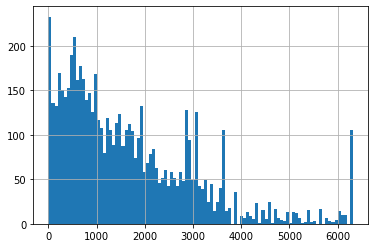

In [92]:
df3['85th_perc'].hist(bins=100)

In [93]:
df3 = df3.sort_values(by='85th_perc', ascending=False)
df3 = make_level(df3, '85th_perc')

fh = open("ranked_ayahs.pckl","wb")
pckl.dump(df3, fh)
fh.close()